In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Caricamento del dataset
df = pd.read_csv('train.csv')

# 2. Ispezione rapida
print("--- Prime 5 righe del dataset ---")
display(df.head())

--- Prime 5 righe del dataset ---


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [65]:
print("\n--- Informazioni sul dataset ---")
df.info()


--- Informazioni sul dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64

In [66]:
object_df = df.select_dtypes(include=[np.object_])
object_df.nunique()

gender               3
ethnicity            5
education_level      4
income_level         5
smoking_status       3
employment_status    4
dtype: int64

In [67]:
unique_values = object_df.apply(lambda x: x.unique())
print(unique_values)

gender                                         [Female, Male, Other]
ethnicity                     [Hispanic, White, Asian, Black, Other]
education_level      [Highschool, Graduate, Postgraduate, No formal]
income_level         [Lower-Middle, Upper-Middle, Low, Middle, High]
smoking_status                              [Current, Never, Former]
employment_status           [Employed, Retired, Student, Unemployed]
dtype: object


In [68]:
income_level_to_value = {'Lower-Middle' : 2, 'Upper-Middle':4, 'Low': 1, 'Middle':3, 'High':5}
df['income_level'] = df['income_level'].map(income_level_to_value)
df = pd.get_dummies(df, drop_first=True)

In [69]:
# Visualizza tutte le colonne solo all'interno di questo blocco
with pd.option_context('display.max_columns', None):
    display(df.head())

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,income_level,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,2,0,0,0,1.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,4,0,0,0,1.0,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,2,0,0,0,0.0,True,False,False,True,False,False,True,False,False,False,True,True,False,False
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,2,0,1,0,1.0,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,4,0,1,0,1.0,True,False,False,False,False,True,True,False,False,False,True,True,False,False


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


## Osservazioni

### Colonna Target

- **media** :0.62. A differenza della realtà abbiamo tanti casi di diabete. Ma aspetta, la colonna diabete sono solo 0 e 1 (lo ha e non lo ha) oppure 0,1,2? Perché a seconda di questo cambia il modo in cui valutare la media

In [71]:
df["diagnosed_diabetes"].unique()

array([1., 0.])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

Quindi non ci troviamo davanti a un dataset sbilanciato con un caso di diabete ogni x sani, ma quasi uno ogni due

Siccome il dataset è bilanciato sul target non devo fare operazioni per bilanciarlo artificalmente o usare strumenti tipo stratified kfold / creare righe duplicate etc...


### Guardiamo adesso i minimi e massimi delle nostre colonne

A livello di minimi massimi da tenere d'occhio non c'è nulla di significativo

### Dispersione

Ci sono valori di deviazione standard molto elevati?

No la devazione standard non ha livelli allarmanti su alcuna colonna

### Mediana

Ci sono feature con mediana tanto differente dalla media?

physical_activity_minutes_per_week	media = 80.230803	mediana = 71.00	

#### FARE APPROFONDIMENTO SU physical_activity_minutes_per_week

# ALGORITMO ML PER PREDIRE GENDER DA "Other"

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

print("=== PREDIZIONE GENDER PER CASI 'Other' ===")

# Preparazione dati per predire gender
# Filtriamo solo i dati con gender Male o Female per il training
gender_train_df = df[~df['gender_Other']].copy()  # Escludiamo i casi "Other"
gender_other_df = df[df['gender_Other']].copy()   # Solo i casi "Other"

print(f"Casi per training (M/F): {len(gender_train_df)}")
print(f"Casi 'Other' da predire: {len(gender_other_df)}")

if len(gender_other_df) > 0:
    # Features per il modello (escludiamo tutte le colonne relative al gender e al target)
    features_to_exclude = [
        'id', 'diagnosed_diabetes', 'gender_Male', 'gender_Other',
        'family_history_diabetes', 'hypertension_history', 'cardiovascular_history'
    ]
    
    # Selezioniamo features appropriate
    numeric_features = df.select_dtypes(include=[np.number, bool]).columns.tolist()
    features_for_gender = [col for col in numeric_features if col not in features_to_exclude]
    
    # Aggiungiamo anche le colonne categoriche (se presenti dopo il get_dummies)
    categorical_features = [col for col in df.columns if col not in numeric_features 
                           and col not in ['gender_Male', 'gender_Other']]
    features_for_gender += categorical_features
    
    # Rimuoviamo eventuali colonne che non esistono più
    features_for_gender = [col for col in features_for_gender if col in gender_train_df.columns]
    
    print(f"\nFeatures usate per predire gender: {len(features_for_gender)}")
    
    # Target: gender_Male (True = Male, False = Female)
    X_gender = gender_train_df[features_for_gender]
    y_gender = gender_train_df['gender_Male']
    
    # Split dei dati
    X_train, X_test, y_train, y_test = train_test_split(
        X_gender, y_gender, test_size=0.2, random_state=42, stratify=y_gender
    )
    
    # Normalizzazione delle features numeriche
    scaler = StandardScaler()
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    if len(numeric_cols) > 0:
        X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
        X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
    
    # Addestramento del modello
    gender_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    )
    
    gender_model.fit(X_train_scaled, y_train)
    
    # Valutazione
    y_pred = gender_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuratezza nella predizione del gender: {accuracy:.4f}")
    
    # Predizione per i casi "Other"
    X_other = gender_other_df[features_for_gender]
    
    # Normalizzazione
    if len(numeric_cols) > 0:
        X_other_scaled = X_other.copy()
        X_other_scaled[numeric_cols] = scaler.transform(X_other[numeric_cols])
    else:
        X_other_scaled = X_other
    
    # Predizione
    other_predictions = gender_model.predict(X_other_scaled)
    
    # Sostituzione dei valori "Other" con le predizioni
    df.loc[df['gender_Other'], 'gender_Male'] = other_predictions
    df.loc[df['gender_Other'], 'gender_Other'] = False
    
    print(f"\nPredetti gender per {len(gender_other_df)} casi 'Other':")
    print(f"Male: {sum(other_predictions)}")
    print(f"Female: {len(other_predictions) - sum(other_predictions)}")
else:
    print("\nNessun caso 'Other' trovato nel dataset.")

=== PREDIZIONE GENDER PER CASI 'Other' ===
Casi per training (M/F): 696322
Casi 'Other' da predire: 3678

Features usate per predire gender: 28

Accuratezza nella predizione del gender: 0.5058

Predetti gender per 3678 casi 'Other':
Male: 1867
Female: 1811


# RIMOZIONE OUTLIER

In [74]:
print("\n\n=== RIMOZIONE OUTLIER ===")

def remove_outliers_iqr(dataframe, columns, threshold=1.5):
    """
    Rimuove outlier usando il metodo IQR
    """
    df_clean = dataframe.copy()
    
    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Contiamo gli outlier prima della rimozione
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
            if len(outliers) > 0:
                print(f"Colonna '{col}': {len(outliers)} outlier trovati ({len(outliers)/len(df_clean)*100:.2f}%)")
            
            # Rimuoviamo gli outlier
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Selezioniamo solo le colonne numeriche (escludendo id e target)
numeric_cols_for_outliers = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_for_outliers = [col for col in numeric_cols_for_outliers 
                            if col not in ['id', 'diagnosed_diabetes', 'income_level', 
                                          'family_history_diabetes', 'hypertension_history', 
                                          'cardiovascular_history', 'gender_Male']]

# Rimuoviamo anche le colonne booleane create da get_dummies
bool_cols = df.select_dtypes(include=[bool]).columns.tolist()
numeric_cols_for_outliers = [col for col in numeric_cols_for_outliers if col not in bool_cols]

print(f"Analisi outlier su {len(numeric_cols_for_outliers)} colonne numeriche")
print("Prime 10 colonne per outlier detection:")
print(numeric_cols_for_outliers[:10])

# Rimozione outlier
original_size = len(df)
df = remove_outliers_iqr(df, numeric_cols_for_outliers)
print(f"\nDataset originale: {original_size} righe")
print(f"Dataset dopo rimozione outlier: {len(df)} righe")
print(f"Righe rimosse: {original_size - len(df)} ({(original_size - len(df))/original_size*100:.2f}%)")



=== RIMOZIONE OUTLIER ===
Analisi outlier su 15 colonne numeriche
Prime 10 colonne per outlier detection:
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp']
Colonna 'age': 1013 outlier trovati (0.14%)
Colonna 'alcohol_consumption_per_week': 508 outlier trovati (0.07%)
Colonna 'physical_activity_minutes_per_week': 33401 outlier trovati (4.78%)
Colonna 'diet_score': 1914 outlier trovati (0.29%)
Colonna 'sleep_hours_per_day': 5831 outlier trovati (0.88%)
Colonna 'screen_time_hours_per_day': 2190 outlier trovati (0.33%)
Colonna 'bmi': 4521 outlier trovati (0.69%)
Colonna 'waist_to_hip_ratio': 4239 outlier trovati (0.65%)
Colonna 'systolic_bp': 648 outlier trovati (0.10%)
Colonna 'diastolic_bp': 5227 outlier trovati (0.81%)
Colonna 'heart_rate': 4769 outlier trovati (0.74%)
Colonna 'cholesterol_total': 1441 outlier trovati (0.23%)
Colonna

# CREAZIONE CLASSI DISCRETE

In [75]:
print("\n\n=== CREAZIONE CLASSI DISCRETE ===")

# Creazione di classi discrete a partire da variabili continue

# 1. BMI - Classi standard
print("Creazione classi BMI...")
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 35, 100],
    labels=['Sottopeso', 'Normale', 'Sovrappeso', 'Obeso I', 'Obeso II/III'],
    include_lowest=True
)

# 2. Età - Gruppi
print("Creazione gruppi età...")
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['Giovane', 'Adulta', 'Matura', 'Anziana'],
    include_lowest=True
)

# 3. Attività fisica - Classi
print("Creazione classi attività fisica...")
df['activity_level'] = pd.cut(
    df['physical_activity_minutes_per_week'],
    bins=[0, 150, 300, float('inf')],
    labels=['Sedentario', 'Moderato', 'Attivo'],
    include_lowest=True
)

# 4. Pressione sanguigna - Classi
print("Creazione classi pressione...")
df['bp_category'] = pd.cut(
    df['systolic_bp'],
    bins=[0, 120, 140, float('inf')],
    labels=['Normale', 'Pre-ipertensione', 'Ipertensione'],
    include_lowest=True
)

# 5. Sonno - Classi
print("Creazione classi sonno...")
df['sleep_category'] = pd.cut(
    df['sleep_hours_per_day'],
    bins=[0, 6, 8, float('inf')],
    labels=['Carenza', 'Normale', 'Eccesso'],
    include_lowest=True
)

# 6. Colesterolo - Classi
print("Creazione classi colesterolo...")
df['cholesterol_risk'] = pd.cut(
    df['cholesterol_total'],
    bins=[0, 200, 240, float('inf')],
    labels=['Desiderabile', 'Borderline', 'Alto'],
    include_lowest=True
)

# Convertiamo le categorie in dummy variables
print("Conversione categorie in dummy variables...")
categorical_cols = ['bmi_category', 'age_group', 'activity_level', 
                   'bp_category', 'sleep_category', 'cholesterol_risk']

for col in categorical_cols:
    if col in df.columns:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)

print(f"Nuove dimensioni del dataset: {df.shape}")



=== CREAZIONE CLASSI DISCRETE ===
Creazione classi BMI...
Creazione gruppi età...
Creazione classi attività fisica...
Creazione classi pressione...
Creazione classi sonno...
Creazione classi colesterolo...
Conversione categorie in dummy variables...
Nuove dimensioni del dataset: (620703, 50)


# Visualizzazione delle Correlazioni

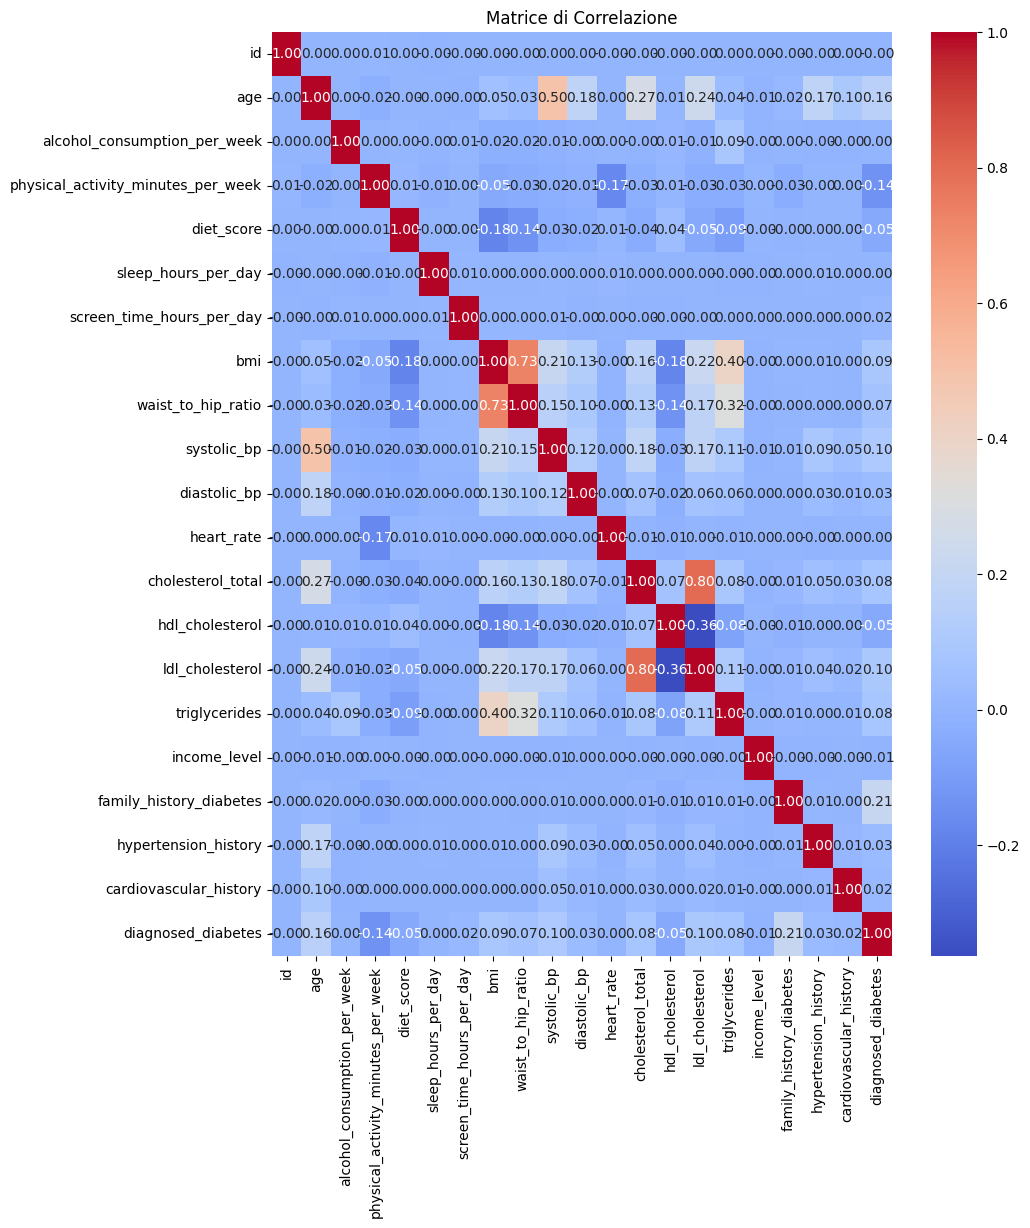

In [76]:
# Selezioniamo solo le colonne numeriche per la matrice di correlazione
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

## Correlazione

**family history diabetes** 0.21

**phisical activiy** -0.17

**age** 0.16

bmi

systolic.bp

ldl cholesterol

family history diabetes

### Correlate a phisical activity

heart-rate -0.27

### Correalte a Age

hypertantion and cardiovascular history

ldl cholesterol

cholesterol total

distolic bp

sistolic bp

# FEATURE ENG



### 1. Indicatori di Insulino-Resistenza e Rischio Lipidico (Fondamentali)

Il profilo lipidico standard (Totale, HDL, LDL, Trigliceridi) è utile, ma nel diabete di tipo 2 la "dislipidemia diabetica" è specifica. Ecco cosa calcolare:

* **Rapporto Trigliceridi / HDL ($TG/HDL Ratio$)**
    * **Formula:** $\frac{\text{triglycerides}}{\text{hdl\_cholesterol}}$
    * **Significato medico:** È uno dei più potenti marker surrogati dell'**insulino-resistenza**. Un valore elevato (generalmente $> 2.5$ o $3.0$ se in mg/dL) è fortemente correlato a particelle LDL piccole e dense (più pericolose) e iperinsulinemia, anche prima che il diabete venga diagnosticato.
* **Colesterolo Non-HDL**
    * **Formula:** $\text{cholesterol\_total} - \text{hdl\_cholesterol}$
    * **Significato medico:** Le linee guida attuali per il diabete lo considerano un target terapeutico secondario cruciale. Rappresenta tutto il colesterolo "cattivo" (LDL + VLDL + IDL). È spesso un predittore di rischio cardiovascolare migliore dell'LDL da solo nei pazienti diabetici.
* **Rapporto Colesterolo Totale / HDL (Castelli Risk Index I)**
    * **Formula:** $\frac{\text{cholesterol\_total}}{\text{hdl\_cholesterol}}$
    * **Significato medico:** Valuta il rischio cardiovascolare globale. Nel diabetico, vogliamo mantenere questo rapporto il più basso possibile ($< 3.5$ idealmente).

### 2. Indicatori Emodinamici (Pressione Sanguigna)

L'ipertensione e il diabete viaggiano spesso insieme.

* **Pressione Differenziale (Pulse Pressure - PP)**
    * **Formula:** $\text{systolic\_bp} - \text{diastolic\_bp}$
    * **Significato medico:** Indica la rigidità arteriosa. Nel diabete, le arterie tendono a indurirsi prima. Una PP ampia ($> 60$ mmHg) è un fattore di rischio indipendente per eventi cardiaci e danni ai reni (nefropatia diabetica).
* **Pressione Arteriosa Media (MAP)**
    * **Formula:** $\text{diastolic\_bp} + \frac{1}{3}(\text{systolic\_bp} - \text{diastolic\_bp})$
    * **Significato medico:** Indica la pressione di perfusione degli organi vitali. È utile per valutare il carico cronico sul sistema vascolare.

### 3. Indicatori di Stile di Vita e Obesità Viscerale

Oltre al BMI (che non distingue tra muscolo e grasso) e al `waist_to_hip_ratio` (già presente e ottimo), possiamo combinare i fattori comportamentali.

* **Indice di Sedentarietà Relativa**
    * **Formula:** $\frac{\text{screen\_time\_hours\_per\_day} \times 7}{\text{physical\_activity\_minutes\_per\_week} / 60}$
    * *Nota:* Stiamo convertendo tutto in ore settimanali per avere un rapporto adimensionale o comparabile.
    * **Significato medico:** Il diabete è fortemente legato non solo alla mancanza di attività, ma al tempo trascorso seduti. Un alto rapporto indica un fenotipo ad alto rischio metabolico.
* **Interaction Term: BMI $\times$ Età**
    * **Significato medico:** L'impatto del BMI sul rischio di diabete cambia con l'età. Un BMI alto in giovane età è molto più predittivo per lo sviluppo precoce del diabete rispetto a un BMI alto in età avanzata. Creare questa variabile di interazione può aiutare i modelli di machine learning a catturare questa sfumatura.

### 4. Score di Sindrome Metabolica (Proxy)

Poiché hai quasi tutti i componenti della Sindrome Metabolica (tranne la glicemia a digiuno, ma hai l'outcome), puoi creare un punteggio di rischio (0-4) sommando le seguenti condizioni booleane (soglie basate su criteri ATP III / IDF):

1.  **Obesità addominale:** `waist_to_hip_ratio` $> 0.90$ (uomini) o $> 0.85$ (donne) [o usare BMI $> 30$ se WHR non è standardizzato].
2.  **Trigliceridi alti:** `triglycerides` $\ge 150$ mg/dL.
3.  **HDL basso:** `hdl_cholesterol` $< 40$ (uomini) o $< 50$ (donne).
4.  **Pressione alta:** `systolic_bp` $\ge 130$ oppure `diastolic_bp` $\ge 85$ (oppure `hypertension_history` == 1).

**Perché calcolarlo?** Più alto è questo punteggio, esponenzialmente più alto è il rischio di conversione in diabete franco o complicazioni.

### Riassunto per il tuo codice (Python/Pandas):

Se vuoi implementare subito i più impattanti, ecco come trasformerei il DataFrame:

1.  `TG_HDL_Ratio` (Trigliceridi / HDL) -> **Top Priority**
2.  `Non_HDL_Cholesterol` (Totale - HDL)
3.  `Pulse_Pressure` (Sistolica - Diastolica)
4.  `Metabolic_Syndrome_Score` (Somma dei fattori di rischio sopra citati)


In [77]:

df_eng = df.copy()

# ==========================================================================
# 0. GESTIONE SESSO (Logica One-Hot)
# ==========================================================================
# Definiamo le maschere booleane per identificare i gruppi.

# 1. Identifichiamo gli UOMINI
is_male = df_eng['gender_Male'] == 1

# 2. Identifichiamo "ALTRO" (Solo se la colonna esiste!)
if 'gender_Other' in df_eng.columns:
    is_other = df_eng['gender_Other'] == 1
else:
    # Se non c'è la colonna, assumiamo False per tutti (nessun "Other" rilevato)
    is_other = pd.Series(False, index=df_eng.index)
    # Nota: Se avevi 'Other' nel dataset originale e l'hai persa col get_dummies,
    # qui verranno trattati come Donne.

# 3. Identifichiamo le DONNE
# Sono coloro che NON sono uomini E NON sono altro
is_female = (~is_male) & (~is_other)

# ==========================================================================
# 1. INDICATORI LIPIDICI (Invariati)
# ==========================================================================
epsilon = 1e-6
df_eng['tg_hdl_ratio'] = df_eng['triglycerides'] / (df_eng['hdl_cholesterol'] + epsilon)
df_eng['non_hdl_cholesterol'] = df_eng['cholesterol_total'] - df_eng['hdl_cholesterol']
df_eng['castelli_risk_index_1'] = df_eng['cholesterol_total'] / (df_eng['hdl_cholesterol'] + epsilon)

# ==========================================================================
# 2. INDICATORI EMODINAMICI (Invariati)
# ==========================================================================
df_eng['pulse_pressure'] = df_eng['systolic_bp'] - df_eng['diastolic_bp']
df_eng['mean_arterial_pressure'] = df_eng['diastolic_bp'] + (df_eng['pulse_pressure'] / 3)

# ==========================================================================
# 3. STILE DI VITA (Invariati)
# ==========================================================================
activity_hours = df_eng['physical_activity_minutes_per_week'] / 60
screen_time_week = df_eng['screen_time_hours_per_day'] * 7
df_eng['sedentary_index'] = screen_time_week / (activity_hours + epsilon)
df_eng['bmi_age_interaction'] = df_eng['bmi'] * df_eng['age']

# ==========================================================================
# 4. SCORE SINDROME METABOLICA (ADATTATO CON NP.SELECT)
# ==========================================================================

# Usiamo np.select per applicare le soglie condizionali in base alle maschere create sopra.
# Ordine condizioni: [Se è Maschio, Se è Donna, (Default/Other)]
# Nota: Se is_other è tutto False, il ramo 'default' non verrà mai attivato se copriamo M e F.
# Quindi strutturiamo: [Maschio, Femmina], default=Other

conditions = [is_male, is_female]

# --- A. Obesità Addominale (WHR) ---
# Uomo > 0.90, Donna > 0.85, Altro = 0.875
whr_thresholds = [0.90, 0.85]
limit_whr = np.select(conditions, whr_thresholds, default=0.875)

df_eng['bool_abdominal_obesity'] = (df_eng['waist_to_hip_ratio'] > limit_whr).astype(int)

# --- B. Trigliceridi Alti ---
# >= 150 per tutti
df_eng['bool_high_triglycerides'] = (df_eng['triglycerides'] >= 150).astype(int)

# --- C. HDL Basso ---
# Uomo < 40, Donna < 50, Altro < 45
hdl_thresholds = [40, 50]
limit_hdl = np.select(conditions, hdl_thresholds, default=45)

df_eng['bool_low_hdl'] = (df_eng['hdl_cholesterol'] < limit_hdl).astype(int)

# --- D. Pressione Alta ---
# >= 130/85 (Uguale per tutti)
df_eng['bool_high_bp'] = (
    (df_eng['systolic_bp'] >= 130) | 
    (df_eng['diastolic_bp'] >= 85) | 
    (df_eng['hypertension_history'] == 1)
).astype(int)

# --- Calcolo Score ---
df_eng['metabolic_syndrome_score'] = (
    df_eng['bool_abdominal_obesity'] + 
    df_eng['bool_high_triglycerides'] + 
    df_eng['bool_low_hdl'] + 
    df_eng['bool_high_bp']
)


In [78]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620703 entries, 0 to 699999
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  620703 non-null  int64  
 1   age                                 620703 non-null  int64  
 2   alcohol_consumption_per_week        620703 non-null  int64  
 3   physical_activity_minutes_per_week  620703 non-null  int64  
 4   diet_score                          620703 non-null  float64
 5   sleep_hours_per_day                 620703 non-null  float64
 6   screen_time_hours_per_day           620703 non-null  float64
 7   bmi                                 620703 non-null  float64
 8   waist_to_hip_ratio                  620703 non-null  float64
 9   systolic_bp                         620703 non-null  int64  
 10  diastolic_bp                        620703 non-null  int64  
 11  heart_rate                     

In [79]:
# ==========================================================================
# 5. INDICATORI DI STRESS CARDIACO E CARICO
# ==========================================================================
# Rate Pressure Product (RPP) o Doppio Prodotto
# Formula: Frequenza Cardiaca * Pressione Sistolica
# Significato: È un indice del consumo di ossigeno del miocardio.
# Nei diabetici, un RPP alto a riposo indica un sistema nervoso simpatico iperattivo.
df_eng['rate_pressure_product'] = df_eng['heart_rate'] * df_eng['systolic_bp']

# Logaritmo dei Trigliceridi
# Significato: I trigliceridi hanno spesso una distribuzione asimmetrica (skewed).
# Il rischio cardiovascolare scala logaritmicamente, non linearmente.
df_eng['log_triglycerides'] = np.log(df_eng['triglycerides'] + 1)

# ==========================================================================
# 6. INDICATORI DI FORMA FISICA COMPLESSA (Proxy Viscerale)
# ==========================================================================
# Poiché non abbiamo la circonferenza vita assoluta (in cm) ma solo il rapporto (WHR),
# e abbiamo il BMI, possiamo creare un termine di interazione.
# Significato: Distingue un BMI alto dovuto a muscoli (WHR basso) 
# da un BMI alto dovuto a grasso viscerale (WHR alto).
df_eng['visceral_adiposity_proxy'] = df_eng['bmi'] * df_eng['waist_to_hip_ratio']

# ==========================================================================
# 7. CURVA DEL SONNO (Relazione a U)
# ==========================================================================
# Il rischio diabete rispetto al sonno non è lineare. Dormire poco fa male, 
# ma dormire troppo fa altrettanto male (spesso indice di depressione o apnea).
# Creiamo la distanza dall'ottimale (7.5 ore).
# Più alto è il valore, peggiore è la condizione.
df_eng['sleep_deviation'] = (df_eng['sleep_hours_per_day'] - 7.5).abs()

# ==========================================================================
# 8. SCORE DI CARICO STORICO/COMORBIDITÀ
# ==========================================================================
# Somma semplice dei fattori di rischio storici/genetici.
# Rappresenta il "carico allostatico" o la fragilità del paziente.
df_eng['comorbidity_burden'] = (
    df_eng['family_history_diabetes'] + 
    df_eng['hypertension_history'] + 
    df_eng['cardiovascular_history']
)

# ==========================================================================
# 9. RAPPORTO DI RISCHIO COMPLETO (Lipidico-Emodinamico)
# ==========================================================================
# Un tentativo di creare un super-feature che combini stress vascolare e metabolico.
# (Sistolica * Trigliceridi) / HDL
# Questo amplifica i pazienti con "Tempesta Metabolica" (Pressione alta + Grassi alti + HDL basso)
df_eng['metabolic_stress_index'] = (
    (df_eng['systolic_bp'] * df_eng['triglycerides']) / (df_eng['hdl_cholesterol'] + epsilon)
)

In [80]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620703 entries, 0 to 699999
Data columns (total 68 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  620703 non-null  int64  
 1   age                                 620703 non-null  int64  
 2   alcohol_consumption_per_week        620703 non-null  int64  
 3   physical_activity_minutes_per_week  620703 non-null  int64  
 4   diet_score                          620703 non-null  float64
 5   sleep_hours_per_day                 620703 non-null  float64
 6   screen_time_hours_per_day           620703 non-null  float64
 7   bmi                                 620703 non-null  float64
 8   waist_to_hip_ratio                  620703 non-null  float64
 9   systolic_bp                         620703 non-null  int64  
 10  diastolic_bp                        620703 non-null  int64  
 11  heart_rate                     

# FEATURE ENGINEERING - CREAZIONE NUOVE FEATURE

In [81]:
print("\n\n=== FEATURE ENGINEERING ===")

# Creazione di feature di interazione e nuove variabili

# Interazioni con BMI
print("1. Creazione interazioni con BMI...")
df_eng['bmi_age_interaction'] = df_eng['bmi'] * df_eng['age']
df_eng['bmi_activity_interaction'] = df_eng['bmi'] / (df_eng['physical_activity_minutes_per_week'] + 1)

# Interazioni metaboliche
print("2. Creazione indici metabolici...")
df_eng['metabolic_risk'] = (
    df_eng['bmi'] * 
    df_eng['waist_to_hip_ratio'] * 
    df_eng['triglycerides'] / (df_eng['hdl_cholesterol'] + 1)
)

# Pressione differenziale
df_eng['pulse_pressure'] = df_eng['systolic_bp'] - df_eng['diastolic_bp']

# Rapporti importanti
df_eng['cholesterol_ratio'] = df_eng['ldl_cholesterol'] / (df_eng['hdl_cholesterol'] + 1)
df_eng['trig_hdl_ratio'] = df_eng['triglycerides'] / (df_eng['hdl_cholesterol'] + 1)

# Score di stile di vita
print("3. Creazione lifestyle score...")
df_eng['lifestyle_score'] = (
    df_eng['diet_score'] * 0.3 +
    (df_eng['physical_activity_minutes_per_week'] / 300) * 0.3 +
    (df_eng['sleep_hours_per_day'] / 8) * 0.2 +
    (1 - df_eng['screen_time_hours_per_day'] / 16) * 0.2
)

# Interazione fumo-alcol (se disponibile)
if 'smoking_status_Former' in df_eng.columns or 'smoking_status_Never' in df_eng.columns:
    print("4. Creazione interazione fumo-alcol...")
    # Creiamo una variabile numerica per il fumo
    df_eng['smoking_numeric'] = (
        df_eng['smoking_status_Former'].astype(int) * 1 + 
        df_eng['smoking_status_Never'].astype(int) * 0
    )
    # Se Current non è presente come dummy, assumiamo che sia quando entrambi sono False
    if 'smoking_status_Former' in df_eng.columns and 'smoking_status_Never' in df_eng.columns:
        df_eng['smoking_numeric'] = np.where(
            (df_eng['smoking_status_Former'] == False) & (df_eng['smoking_status_Never'] == False),
            2,  # Current smoker
            df_eng['smoking_numeric']
        )
    
    df_eng['smoking_alcohol_interaction'] = (
        df_eng['smoking_numeric'] * df_eng['alcohol_consumption_per_week']
    )

# Feature polinomiali
print("5. Creazione feature polinomiali...")
df_eng['bmi_squared'] = df_eng['bmi'] ** 2
df_eng['age_squared'] = df_eng['age'] ** 2
df_eng['waist_hip_squared'] = df_eng['waist_to_hip_ratio'] ** 2

# Feature aggregate
print("6. Creazione feature aggregate...")

# Conta condizioni di rischio
risk_factors = []
if 'hypertension_history' in df_eng.columns:
    risk_factors.append(df_eng['hypertension_history'])
if 'cardiovascular_history' in df_eng.columns:
    risk_factors.append(df_eng['cardiovascular_history'])
if 'family_history_diabetes' in df_eng.columns:
    risk_factors.append(df_eng['family_history_diabetes'])

if risk_factors:
    df_eng['total_risk_factors'] = sum(risk_factors)

# BMI categorico come variabile binaria
df_eng['obese'] = (df_eng['bmi'] >= 30).astype(int)
df_eng['overweight'] = ((df_eng['bmi'] >= 25) & (df_eng['bmi'] < 30)).astype(int)

# Score di rischio combinato
print("7. Creazione score di rischio combinato...")
df_eng['combined_risk_score'] = (
    df_eng['bmi'] / 30 * 0.25 +
    df_eng['age'] / 100 * 0.2 +
    df_eng['waist_to_hip_ratio'] * 0.15 +
    (df_eng['cholesterol_total'] / 200) * 0.15 +
    (df_eng['systolic_bp'] / 120) * 0.15 +
    (df_eng['triglycerides'] / 150) * 0.1
)

# Altre feature utili
print("8. Creazione altre feature utili...")

# Indice di rischio cardiovascolare semplificato
df_eng['cv_risk_index'] = (
    (df_eng['age'] > 50).astype(int) * 0.2 +
    (df_eng['systolic_bp'] > 140).astype(int) * 0.2 +
    (df_eng['cholesterol_total'] > 240).astype(int) * 0.2 +
    (df_eng['bmi'] > 30).astype(int) * 0.2 +
    (df_eng['family_history_diabetes'] == 1).astype(int) * 0.2
)

# Interazione età-fattori di rischio
df_eng['age_risk_interaction'] = df_eng['age'] * df_eng['total_risk_factors']

print(f"\nDimensioni finali del dataset con feature engineering: {df_eng.shape}")
print(f"Numero totale di features: {len(df_eng.columns)}")

# Confronto con il dataset originale
print(f"\nConfronto dimensioni:")
print(f"Dataset originale (df): {df.shape}")
print(f"Dataset con feature engineering (df_eng): {df_eng.shape}")
print(f"Nuove features aggiunte: {len(df_eng.columns) - len(df.columns)}")

# Visualizzazione delle nuove features
print("\nNuove features create:")
new_features = list(set(df_eng.columns) - set(df.columns))
for i, feature in enumerate(new_features, 1):
    print(f"{i}. {feature}")

# Statistiche delle nuove features numeriche
print("\nStatistiche di alcune nuove features importanti:")
new_numeric_features = df_eng[new_features].select_dtypes(include=[np.number]).columns
if len(new_numeric_features) > 0:
    stats_df = pd.DataFrame({
        'Feature': new_numeric_features,
        'Min': df_eng[new_numeric_features].min(),
        'Max': df_eng[new_numeric_features].max(),
        'Mean': df_eng[new_numeric_features].mean(),
        'Std': df_eng[new_numeric_features].std()
    })
    print(stats_df.to_string(index=False))



=== FEATURE ENGINEERING ===
1. Creazione interazioni con BMI...
2. Creazione indici metabolici...
3. Creazione lifestyle score...
4. Creazione interazione fumo-alcol...
5. Creazione feature polinomiali...
6. Creazione feature aggregate...
7. Creazione score di rischio combinato...
8. Creazione altre feature utili...

Dimensioni finali del dataset con feature engineering: (620703, 84)
Numero totale di features: 84

Confronto dimensioni:
Dataset originale (df): (620703, 50)
Dataset con feature engineering (df_eng): (620703, 84)
Nuove features aggiunte: 34

Nuove features create:
1. cholesterol_ratio
2. combined_risk_score
3. sleep_deviation
4. trig_hdl_ratio
5. smoking_alcohol_interaction
6. bool_abdominal_obesity
7. bmi_activity_interaction
8. rate_pressure_product
9. tg_hdl_ratio
10. metabolic_syndrome_score
11. metabolic_stress_index
12. log_triglycerides
13. obese
14. bool_high_triglycerides
15. total_risk_factors
16. comorbidity_burden
17. non_hdl_cholesterol
18. bmi_squared
19. l

In [82]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from optuna.integration import LightGBMPruningCallback
import numpy as np

# --- 1. MODIFICA CRUCIALE: Usiamo solo una frazione dei dati ---
# Per la demo usiamo solo il 100% dei dati.
# Questo rende tutto 10 volte più veloce istantaneamente.
df_demo = df_eng.sample(frac=1, random_state=42)

X = df_demo.drop(columns=["diagnosed_diabetes"], axis=1)
y = df_demo["diagnosed_diabetes"]

# Ottimizzazione Memoria
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')

# Split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def objective(trial):
    params = {
        # --- Config Hardware ---
        'device_type': 'cpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0,
        'n_jobs': -1, 
        'verbose': -1,
        
        # --- Config VELOCITÀ ESTREMA ---
        'max_bin': 15,          # Default 255. A 15 è velocissimo (ma perde precisione).
        'bagging_freq': 1,      # Ricampiona i dati ad ogni iterazione
        'bagging_fraction': 0.8,# Usa solo il 80% dei dati per ogni albero (più veloce)
        
        # --- Parametri Modello ---
        'objective': 'binary',
        'metric': 'auc', 
        'boosting_type': 'gbdt',
        
        # --- Search Space (Ridotto per convergere prima) ---
        'n_estimators': 1000, # Abbassato il tetto massimo
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3, log=True), # LR più alto = impara prima
        'num_leaves': trial.suggest_int('num_leaves', 20, 100), # Meno foglie = alberi più semplici
        'max_depth': trial.suggest_int('max_depth', 3, 8),      # Alberi meno profondi
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 100, 1000),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
    }

    model = lgb.LGBMClassifier(**params)
    
    # Callback Pruning
    pruning_callback = LightGBMPruningCallback(trial, "auc")
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=[
            # Smetti subito se non migliori per 10 round (molto aggressivo)
            lgb.early_stopping(stopping_rounds=10, verbose=False),
            pruning_callback
        ]
    )
    
    preds = model.predict(X_val)
    accuracy = np.mean(preds == y_val)
    
    return accuracy

# --- Studio ---
print("--- Inizio Demo Rapida (Hyperband + 10% Dati) ---")

# HyperbandPruner è perfetto per le demo: prova tanti parametri all'inizio con poche risorse
# e uccide spietatamente quelli che non promettono bene.
study = optuna.create_study(
    direction='maximize', 
    study_name="Demo_Class_LGBM",
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, max_resource='auto', reduction_factor=3)
)

# 30 tentativi dovrebbero finire in 1-3 minuti con queste impostazioni
study.optimize(objective, n_trials=30, show_progress_bar=True)

print(f"\nMiglior Accuratezza (sul sample ridotto): {study.best_value:.4f}")
print("Migliori Parametri:", study.best_params)

[I 2025-12-05 17:58:51,474] A new study created in memory with name: Demo_Class_LGBM


--- Inizio Demo Rapida (Hyperband + 10% Dati) ---


Best trial: 0. Best value: 0.663133:   3%|▎         | 1/30 [00:04<02:01,  4.18s/it]

[I 2025-12-05 17:58:55,654] Trial 0 finished with value: 0.6631330503218115 and parameters: {'learning_rate': 0.11526721279266318, 'num_leaves': 55, 'max_depth': 7, 'min_data_in_leaf': 867, 'reg_alpha': 0.02516254420610334, 'reg_lambda': 4.422595658873113}. Best is trial 0 with value: 0.6631330503218115.


Best trial: 0. Best value: 0.663133:   7%|▋         | 2/30 [00:06<01:25,  3.04s/it]

[I 2025-12-05 17:58:57,906] Trial 1 finished with value: 0.6621905736219299 and parameters: {'learning_rate': 0.20854835333361435, 'num_leaves': 45, 'max_depth': 8, 'min_data_in_leaf': 796, 'reg_alpha': 0.0014727450296453237, 'reg_lambda': 0.00859207319071362}. Best is trial 0 with value: 0.6631330503218115.


Best trial: 0. Best value: 0.663133:  10%|█         | 3/30 [00:07<00:53,  1.97s/it]

[I 2025-12-05 17:58:58,601] Trial 2 pruned. Trial was pruned at iteration 1.


Best trial: 0. Best value: 0.663133:  13%|█▎        | 4/30 [00:09<00:57,  2.21s/it]

[I 2025-12-05 17:59:01,182] Trial 3 finished with value: 0.662424178957798 and parameters: {'learning_rate': 0.1454683397175456, 'num_leaves': 59, 'max_depth': 8, 'min_data_in_leaf': 640, 'reg_alpha': 0.19386932774096025, 'reg_lambda': 5.787305100833194}. Best is trial 0 with value: 0.6631330503218115.


Best trial: 0. Best value: 0.663133:  17%|█▋        | 5/30 [00:10<00:40,  1.61s/it]

[I 2025-12-05 17:59:01,738] Trial 4 pruned. Trial was pruned at iteration 3.


Best trial: 0. Best value: 0.663133:  20%|██        | 6/30 [00:10<00:30,  1.25s/it]

[I 2025-12-05 17:59:02,295] Trial 5 pruned. Trial was pruned at iteration 1.


Best trial: 0. Best value: 0.663133:  23%|██▎       | 7/30 [00:11<00:23,  1.03s/it]

[I 2025-12-05 17:59:02,876] Trial 6 pruned. Trial was pruned at iteration 1.


Best trial: 0. Best value: 0.663133:  27%|██▋       | 8/30 [00:11<00:19,  1.12it/s]

[I 2025-12-05 17:59:03,476] Trial 7 pruned. Trial was pruned at iteration 1.


Best trial: 0. Best value: 0.663133:  30%|███       | 9/30 [00:16<00:44,  2.13s/it]

[I 2025-12-05 17:59:08,318] Trial 8 finished with value: 0.6627705592833955 and parameters: {'learning_rate': 0.11331334828211576, 'num_leaves': 68, 'max_depth': 4, 'min_data_in_leaf': 476, 'reg_alpha': 0.5926873270437718, 'reg_lambda': 2.3516073308029957}. Best is trial 0 with value: 0.6631330503218115.


Best trial: 0. Best value: 0.663133:  33%|███▎      | 10/30 [00:17<00:34,  1.73s/it]

[I 2025-12-05 17:59:09,155] Trial 9 pruned. Trial was pruned at iteration 3.


Best trial: 0. Best value: 0.663133:  37%|███▋      | 11/30 [00:19<00:32,  1.69s/it]

[I 2025-12-05 17:59:10,761] Trial 10 pruned. Trial was pruned at iteration 27.


Best trial: 0. Best value: 0.663133:  40%|████      | 12/30 [00:20<00:26,  1.45s/it]

[I 2025-12-05 17:59:11,651] Trial 11 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  43%|████▎     | 13/30 [00:25<00:46,  2.76s/it]

[I 2025-12-05 17:59:17,437] Trial 12 finished with value: 0.6632941574499964 and parameters: {'learning_rate': 0.08630367656540386, 'num_leaves': 85, 'max_depth': 4, 'min_data_in_leaf': 320, 'reg_alpha': 2.199316349967542, 'reg_lambda': 4.111973656192615}. Best is trial 12 with value: 0.6632941574499964.


Best trial: 12. Best value: 0.663294:  47%|████▋     | 14/30 [00:26<00:34,  2.15s/it]

[I 2025-12-05 17:59:18,157] Trial 13 pruned. Trial was pruned at iteration 3.


Best trial: 12. Best value: 0.663294:  50%|█████     | 15/30 [00:27<00:24,  1.65s/it]

[I 2025-12-05 17:59:18,644] Trial 14 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  53%|█████▎    | 16/30 [00:27<00:18,  1.31s/it]

[I 2025-12-05 17:59:19,164] Trial 15 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  57%|█████▋    | 17/30 [00:28<00:13,  1.07s/it]

[I 2025-12-05 17:59:19,679] Trial 16 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  60%|██████    | 18/30 [00:28<00:11,  1.07it/s]

[I 2025-12-05 17:59:20,305] Trial 17 pruned. Trial was pruned at iteration 3.


Best trial: 12. Best value: 0.663294:  63%|██████▎   | 19/30 [00:29<00:09,  1.13it/s]

[I 2025-12-05 17:59:21,044] Trial 18 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  67%|██████▋   | 20/30 [00:30<00:08,  1.18it/s]

[I 2025-12-05 17:59:21,824] Trial 19 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  70%|███████   | 21/30 [00:37<00:23,  2.64s/it]

[I 2025-12-05 17:59:28,653] Trial 20 finished with value: 0.6629155556987619 and parameters: {'learning_rate': 0.06560607760436812, 'num_leaves': 76, 'max_depth': 7, 'min_data_in_leaf': 876, 'reg_alpha': 0.0944808223783152, 'reg_lambda': 8.978051353576049}. Best is trial 12 with value: 0.6632941574499964.


Best trial: 12. Best value: 0.663294:  73%|███████▎  | 22/30 [00:37<00:16,  2.08s/it]

[I 2025-12-05 17:59:29,432] Trial 21 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  77%|███████▋  | 23/30 [00:38<00:11,  1.64s/it]

[I 2025-12-05 17:59:30,034] Trial 22 pruned. Trial was pruned at iteration 1.


Best trial: 12. Best value: 0.663294:  80%|████████  | 24/30 [00:39<00:08,  1.37s/it]

[I 2025-12-05 17:59:30,769] Trial 23 pruned. Trial was pruned at iteration 3.


Best trial: 24. Best value: 0.663302:  83%|████████▎ | 25/30 [00:43<00:11,  2.21s/it]

[I 2025-12-05 17:59:34,952] Trial 24 finished with value: 0.6633022128064057 and parameters: {'learning_rate': 0.09692167773751056, 'num_leaves': 76, 'max_depth': 8, 'min_data_in_leaf': 702, 'reg_alpha': 0.07061571232701726, 'reg_lambda': 1.2192197911214369}. Best is trial 24 with value: 0.6633022128064057.


Best trial: 24. Best value: 0.663302:  87%|████████▋ | 26/30 [00:48<00:12,  3.14s/it]

[I 2025-12-05 17:59:40,261] Trial 25 finished with value: 0.662488621809072 and parameters: {'learning_rate': 0.09867078206027635, 'num_leaves': 92, 'max_depth': 8, 'min_data_in_leaf': 686, 'reg_alpha': 0.0054264102455108595, 'reg_lambda': 1.276026458633872}. Best is trial 24 with value: 0.6633022128064057.


Best trial: 24. Best value: 0.663302:  90%|█████████ | 27/30 [00:49<00:07,  2.50s/it]

[I 2025-12-05 17:59:41,274] Trial 26 pruned. Trial was pruned at iteration 3.


Best trial: 24. Best value: 0.663302:  93%|█████████▎| 28/30 [00:51<00:04,  2.23s/it]

[I 2025-12-05 17:59:42,885] Trial 27 pruned. Trial was pruned at iteration 81.


Best trial: 24. Best value: 0.663302:  97%|█████████▋| 29/30 [00:55<00:02,  2.73s/it]

[I 2025-12-05 17:59:46,765] Trial 28 finished with value: 0.6626336182244383 and parameters: {'learning_rate': 0.09881878648544871, 'num_leaves': 98, 'max_depth': 8, 'min_data_in_leaf': 217, 'reg_alpha': 0.21183531741903408, 'reg_lambda': 0.9393858686525887}. Best is trial 24 with value: 0.6633022128064057.


Best trial: 24. Best value: 0.663302: 100%|██████████| 30/30 [00:57<00:00,  1.91s/it]

[I 2025-12-05 17:59:48,912] Trial 29 finished with value: 0.6617797504450584 and parameters: {'learning_rate': 0.2485268451973282, 'num_leaves': 45, 'max_depth': 5, 'min_data_in_leaf': 751, 'reg_alpha': 1.0316291325847868, 'reg_lambda': 0.053049053833932}. Best is trial 24 with value: 0.6633022128064057.

Miglior Accuratezza (sul sample ridotto): 0.6633
Migliori Parametri: {'learning_rate': 0.09692167773751056, 'num_leaves': 76, 'max_depth': 8, 'min_data_in_leaf': 702, 'reg_alpha': 0.07061571232701726, 'reg_lambda': 1.2192197911214369}


Addestramento modello finale con parametri: {'device_type': 'cpu', 'gpu_platform_id': 0, 'gpu_device_id': 0, 'objective': 'binary', 'metric': 'auc', 'n_jobs': -1, 'verbose': -1, 'random_state': 42, 'learning_rate': 0.09692167773751056, 'num_leaves': 76, 'max_depth': 8, 'min_data_in_leaf': 702, 'reg_alpha': 0.07061571232701726, 'reg_lambda': 1.2192197911214369}

--- Report Finale ---
Accuratezza sul Test Set: 0.6802

Dettagli per classe:
              precision    recall  f1-score   support

         0.0       0.61      0.36      0.45     45441
         1.0       0.70      0.86      0.77     78700

    accuracy                           0.68    124141
   macro avg       0.65      0.61      0.61    124141
weighted avg       0.67      0.68      0.66    124141



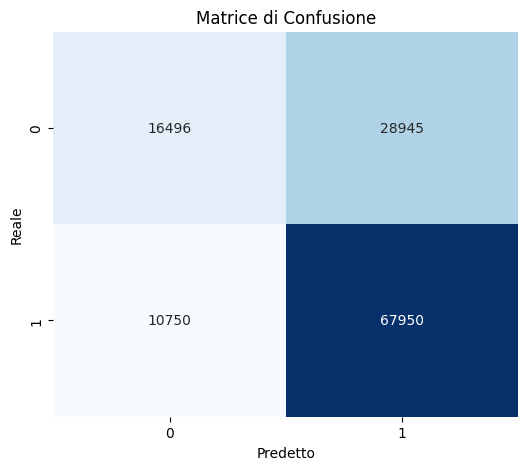

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Recuperiamo i parametri migliori trovati da Optuna
best_params = study.best_params

# 2. Aggiungiamo i parametri "fissi" (GPU, obiettivo, ecc.) che non abbiamo ottimizzato
fixed_params = {
    'device_type': 'cpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'objective': 'binary',
    'metric': 'auc',
    'n_jobs': -1,
    'verbose': -1,
    'random_state': 42
}

# Uniamo i due dizionari (i parametri fissi + i migliori trovati)
final_params = {**fixed_params, **best_params}

print(f"Addestramento modello finale con parametri: {final_params}")

# 3. Addestramento Finale
final_model = lgb.LGBMClassifier(**final_params)
final_model.fit(X_train, y_train)

# 4. Valutazione
y_pred = final_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print(f"\n--- Report Finale ---")
print(f"Accuratezza sul Test Set: {acc:.4f}")
print("\nDettagli per classe:")
print(classification_report(y_val, y_pred))

# 5. Grafico Matrice di Confusione (Ottimo per le presentazioni)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()